Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%notebook inline

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from warnings import simplefilter
simplefilter(action='ignore', category=DeprecationWarning)

Reading csv file and checking head

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Looking for null values

In [4]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Dropping User ID

In [5]:
df1 = df.drop("User ID", axis =1)

Encoding Gender

In [6]:
df1["Gender"] = df1["Gender"].replace({"Male": 0, "Female": 1})

df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


Checking correlation

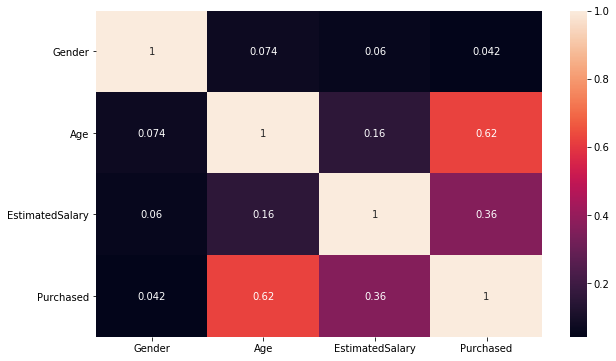

In [7]:
corr = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot = True)

Initialzing classifier

In [8]:
clf = DecisionTreeClassifier()

Defining functions

In [9]:
def train(model):
    model.fit(X_train, y_train)
    print("Model has been trained.\n")

In [10]:
def eval(model):
    test_ac = model.score(X_test, y_test)
    train_ac = model.score(X_train, y_train)
    print("Testing Accuracy: {:.5f}".format(test_ac))
    print("Training Accuracy: {:.5f}".format(train_ac))
    
    if(test_ac < train_ac):
        print("------------------------")
        print("Model is overfittig, needs to be tuned!")

In [11]:
def splitData(df, col):
    
    X = df.drop(col, axis = 1)
    y = df["Purchased"]
    
    sc = StandardScaler()
    X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 101)
    
    return X_train, X_test, y_train, y_test

    

model

In [12]:
cols = ["Purchased"]

X_train, X_test, y_train, y_test = splitData(df1, cols)
train(clf)
eval(clf)


Model has been trained.

Testing Accuracy: 0.88333
Training Accuracy: 0.99643
------------------------
Model is overfittig, needs to be tuned!


The model is overfitting so we can tune hyper parameteres to solve this

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
def hyperTune(clf):
    print("Hyper tuning the model..\n")
    
    params = {'max_leaf_nodes': list(range(2, 50)), 
              'min_samples_split': [2, 3, 4], "criterion": 
          ['gini', 'entropy'], "max_features": [1,2], "max_depth": [2,4,6,8,10,12]}

    grid_clf = GridSearchCV(clf, params, cv = 5, verbose=True, n_jobs=-1, )
    grid_clf.fit(X_train, y_train)
    print("--------------------------------")
    print("Updated Scores:")
    print("Testing Accuracy: ", grid_clf.score(X_test, y_test))
    print("Training Accuracy: ", grid_clf.score(X_train, y_train))
    print("--------------------------------")
    print("Best Parameters:")
    print(grid_clf.best_params_)
    
    

In [15]:
hyperTune(clf)

Hyper tuning the model..

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 3630 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 11630 tasks      | elapsed:   14.2s


--------------------------------
Updated Scores:
Testing Accuracy:  0.9166666666666666
Training Accuracy:  0.9142857142857143
--------------------------------
Best Parameters:
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 2, 'max_leaf_nodes': 8, 'min_samples_split': 4}


[Parallel(n_jobs=-1)]: Done 17280 out of 17280 | elapsed:   19.2s finished


Modifiying parameters of the classifier

In [16]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, max_features=2, max_leaf_nodes=5, min_samples_split=2)

In [17]:
train(clf)
eval(clf)

Model has been trained.

Testing Accuracy: 0.92500
Training Accuracy: 0.91786


Bagging and Boosting

In [18]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [19]:
ra_clf = RandomForestClassifier(n_estimators=100, max_depth=2)


In [20]:
train(ra_clf)
eval(ra_clf)

Model has been trained.

Testing Accuracy: 0.93333
Training Accuracy: 0.92857


In [21]:
ada_clf = AdaBoostClassifier(clf,n_estimators=8, learning_rate=0.5)

In [22]:
train(ada_clf)
eval(ada_clf)

Model has been trained.

Testing Accuracy: 0.92500
Training Accuracy: 0.91786


In [23]:
bg_clf = BaggingClassifier(clf, n_estimators=100, max_samples=0.7, max_features=2)

In [24]:
train(bg_clf)
eval(bg_clf)


Model has been trained.

Testing Accuracy: 0.93333
Training Accuracy: 0.91786


We were able to increase accuracy a little bit using bagging and boosting!